# Titanic Dataset Exploratory Data Analysis (EDA)

This notebook explores the Titanic dataset to understand the factors that influenced passenger survival during the Titanic disaster.

We will clean the data, handle missing values, perform visual analysis, and summarize insights based on various passenger attributes such as survived, age, sex, class, fare, and more.


## 2. Importing Libraries

We import all the necessary Python libraries for data manipulation and visualization.


In [74]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Loading the Dataset

The dataset used is *titanic.csv*, which contains passenger information such as age, class, gender, fare, and survival status.


In [75]:
#Loading Data
titanic = pd.read_csv('titanic.csv')

## 4. Dataset Overview

In this section, we display the first few rows, shape, columns and general structure of the dataset.

In [76]:
#Viewing the data
print(titanic.shape)
titanic.head()
titanic.info()
titanic.describe(include='all')
titanic.columns

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 5. Data Cleaning

### 5.1 Renaming/Dropping Columns
- Rename columns for easier analysis

### 5.2 Dropping Irrelevant Columns
-Columns such as PassengerId, Name, Ticket and Cabin may not be helpful for our analysis.

In [77]:
#Dropping columns
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#Renaming columns
titanic.rename(columns={'Pclass': 'Passenger Class', 'SibSp': 'Siblings/Spouses Aboard', 'Parch': 'Parents/Children Aboard'}, inplace=True)
titanic.head()

,Survived,Passenger Class,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 6. Checking for Missing Values

Missing values can affect model performance, so we analyze which columns contain NaNs and decide whether to drop or fill them.


In [78]:
#NaN values
titanic.isnull().sum()*100/len(titanic)

Survived                    0.000000
Passenger Class             0.000000
Sex                         0.000000
Age                        19.865320
Siblings/Spouses Aboard     0.000000
Parents/Children Aboard     0.000000
Fare                        0.000000
Embarked                    0.224467
dtype: float64

### 6.1 Handling Missing Values(NaN)
- Age: Fill with median age
- Embarked: Fill with the most common value (mode)

In [79]:
#Age NaN
titanic['Age'].unique()
titanic[titanic['Age']==2]
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

#Embarked NaN
titanic[titanic['Embarked'].isna()]
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)



C:\Users\USER\AppData\Local\Temp\ipykernel_13248\4204810943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_13248\4204810943.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

## 7. Remove Duplicates

Remove rows that contain same data, for clean and non-duplicated data

In [80]:
#Remove duplicates
titanic.loc[titanic.duplicated(keep=False)]

titanic.drop_duplicates(keep="first", inplace= True)

## 8. Statical Analysis

We display descriptive statistics for numerical columns and value counts for categorical columns.

This helps us understand distributions, ranges, and potential outliers.


In [81]:
sns.set(style='whitegrid')
%matplotlib inline


## 9. Univariate Analysis

Survival Count  

These visualizations help us understand key characteristics of the dataset.


C:\Users\USER\AppData\Local\Temp\ipykernel_13248\4259484431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Survived', palette='Set2')


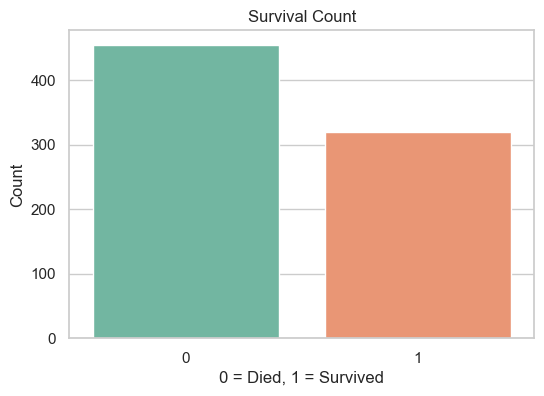

In [82]:
#Survival Count
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('0 = Died, 1 = Survived')
plt.ylabel('Count')
plt.show()

## 10. Bivariate Analysis

We analyze relationships between two variables at a time.

### 10.1 Survival Rate by Gender  
### 10.2 Survival Rate by Passenger Class  
### 10.3 Age vs Survival  
### 10.4 Fare vs Survival  
### 10.5 Pclass vs Age 

C:\Users\USER\AppData\Local\Temp\ipykernel_13248\3353906782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='Sex', y=titanic['Survived'].astype(float), palette='pastel')


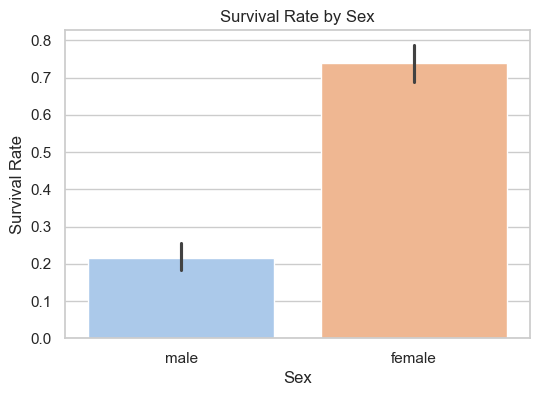

In [83]:
#Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='Sex', y=titanic['Survived'].astype(float), palette='pastel')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13248\744025866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='Passenger Class', y='Survived', palette='viridis')


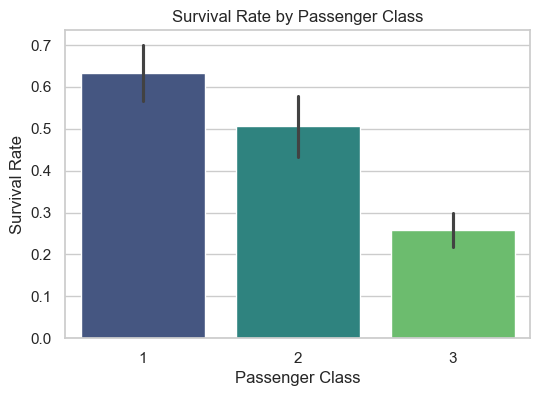

In [84]:
#Survival rate by Passenger Class (Pclass)
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='Passenger Class', y='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

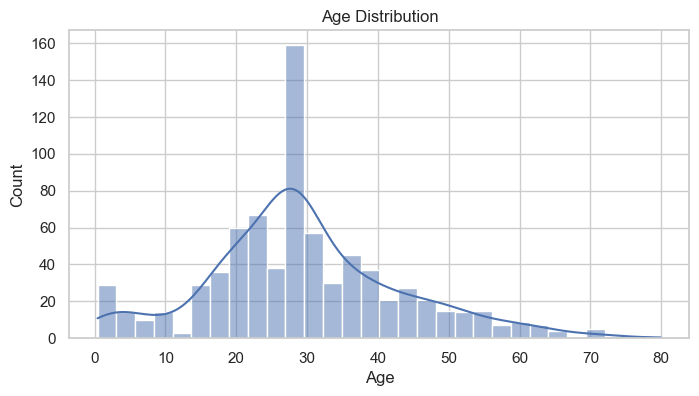

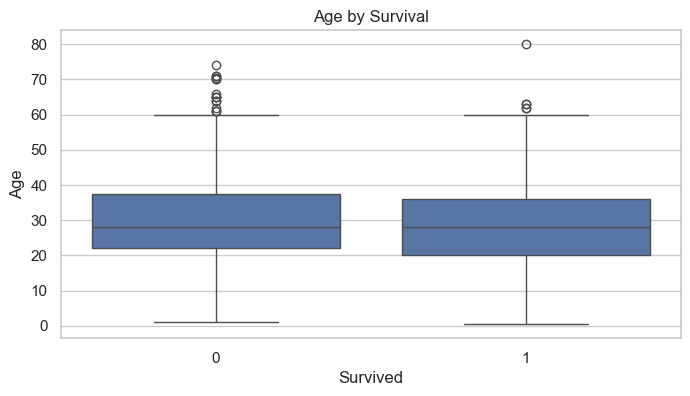

In [85]:
#Surval by Age
plt.figure(figsize=(8,4))
sns.histplot(data=titanic, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age by Survival')
plt.show()

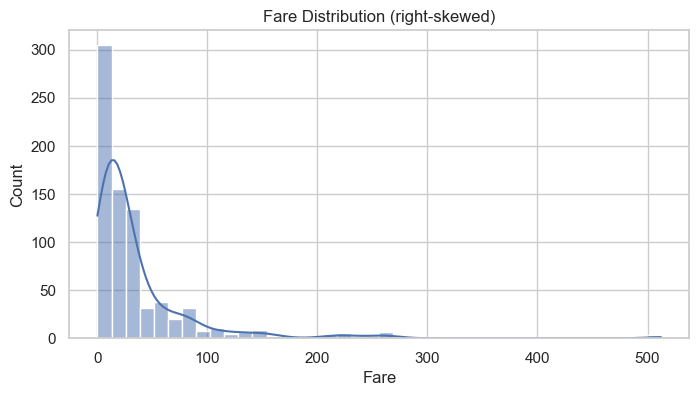

In [86]:
#Fare Distribution
plt.figure(figsize=(8,4))
sns.histplot(data=titanic, x='Fare', bins=40, kde=True)
plt.title('Fare Distribution (right-skewed)')
plt.show()

## 11. Correlation Analysis

We generate a heatmap to visualize correlations between numerical variables.

This helps identify which features may influence survival.

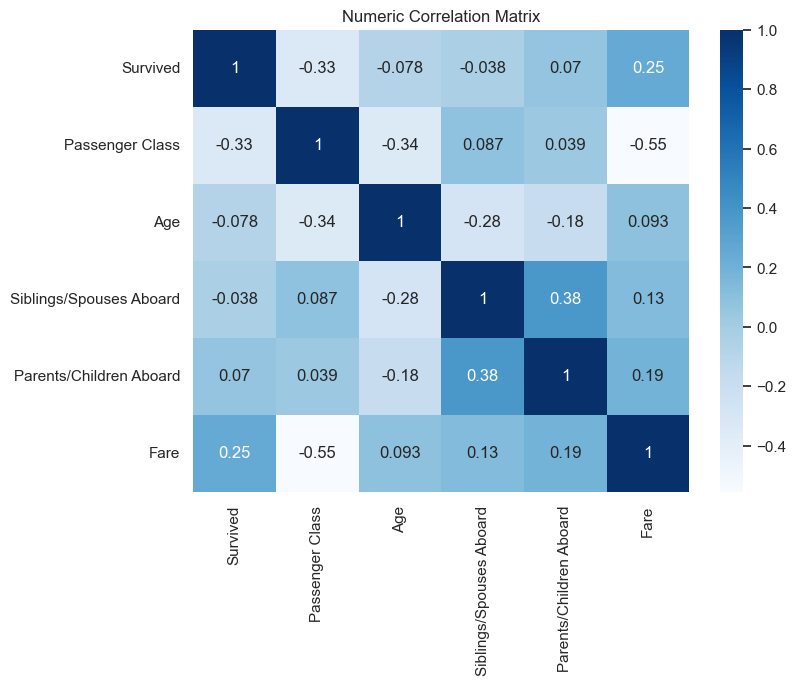

In [87]:
#Correlation heatmap 
plt.figure(figsize=(8,6))
numeric_titanic = titanic.select_dtypes(include=['int64', 'float64'])
cor = numeric_titanic.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.title('Numeric Correlation Matrix')
plt.show()

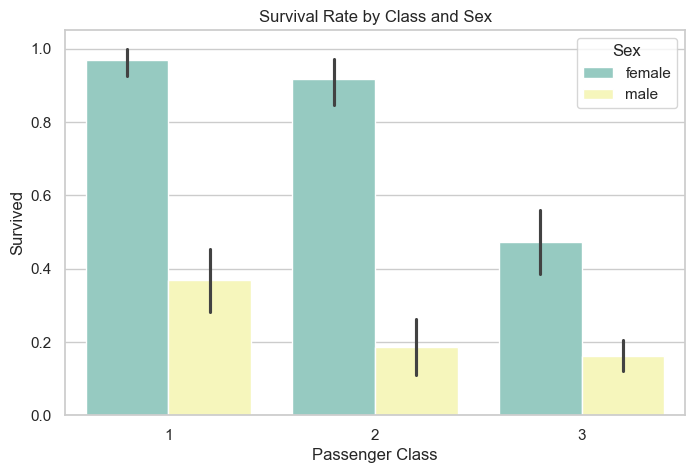

In [88]:
#survival class by sex
plt.figure(figsize=(8,5))
sns.barplot(data=titanic, x='Passenger Class', y=titanic['Survived'].astype(float), hue='Sex', palette='Set3')
plt.title('Survival Rate by Class and Sex')
plt.show()

## 12. Key Insights

- Females had a much higher survival rate than males.
- First-class passengers had the highest survival rate.
- Younger passengers were more likely to survive.
- Higher fares correlate with higher survival, indicating socio-economic advantage.

## 13. Conclusion

The Titanic dataset reveals strong patterns related to passenger survival:

- Gender, age, and class played the biggest roles in determining survival.
- Wealthier passengers (1st class) had access to lifeboats earlier.
- Women and children were prioritized during evacuation.

This EDA provides a solid foundation for building predictive models in the future.


## End of EDA

This concludes the Titanic dataset exploratory data analysis.